## 1(a)   
### Any of these is ok, may have other issues, give credits as long as it is reasonable.
From bus.head(), we can see that there exists issue of bad data: phone number is -9999.
From ins.head(), some of the scores are -1.
And also, there exists some bad data, like we sort the business id column and find there exists a "1000", by observing the other values we believe it should be a loss of the last two digits.

## 1(b)   Some acceptable codes are listed 
### Must return True as the output of is_bid_unique

In [ ]:
count = bus.value_counts('bid')
is_bid_unique = sum(count) == len(count)
##############
is_bid_unique = max(bus.value_counts('bid')) == 1
#############
is_bid_unique = len(pd.unique(bus.bid)) == len(bus.bid)

## 1(c) 
Answer:
(array(["Peet's Coffee & Tea", 'Starbucks Coffee', "McDonald's",
        'Jamba Juice', 'Proper Food'], dtype=object),
 array(['Off The Grid', '428 11th St', '3251 20th Ave', '2948 Folsom St',
        'Pier 41'], dtype=object))
 
 Some codes (could have other choices)
#### 如果不是np.array 扣0.5分
#### 答案不对扣 2 分

In [ ]:
top_names = np.array(bus.value_counts('name',sort=True)[0:5].keys())
top_addresses = np.array(bus.value_counts('address',sort=True)[0:5].keys())
top_names, top_addresses
#####

top_names = np.array(bus.value_counts('name').head(5).index)
top_addresses = np.array(bus.value_counts('name').head(5).index)

top_names, top_addresses

## 1(d)
## 1 pt each
q1d_part1 = "One location of a restaurant."

q1d_part2 = "bid"

## 2(a)
zip_counts = bus.value_counts('postal_code') 
### Issues:  0.5 pt off if no answer for this
-9999, CA, some are 5 digits, while others have different lengths.

## 2(b) 1pt each

q2b_part1 = "Qualitative Nominal"
q2b_part2 = "str"

## 2(c)
### part 1 
valid_zips = pd.read_json(dsDir/"sf_zipcodes.json", dtype=str)['zip_codes']
### 0.5 pt if returning a dataframe using: valid_zips = pd.read_json(dsDir/"sf_zipcodes.json", dtype=str)

### part 2

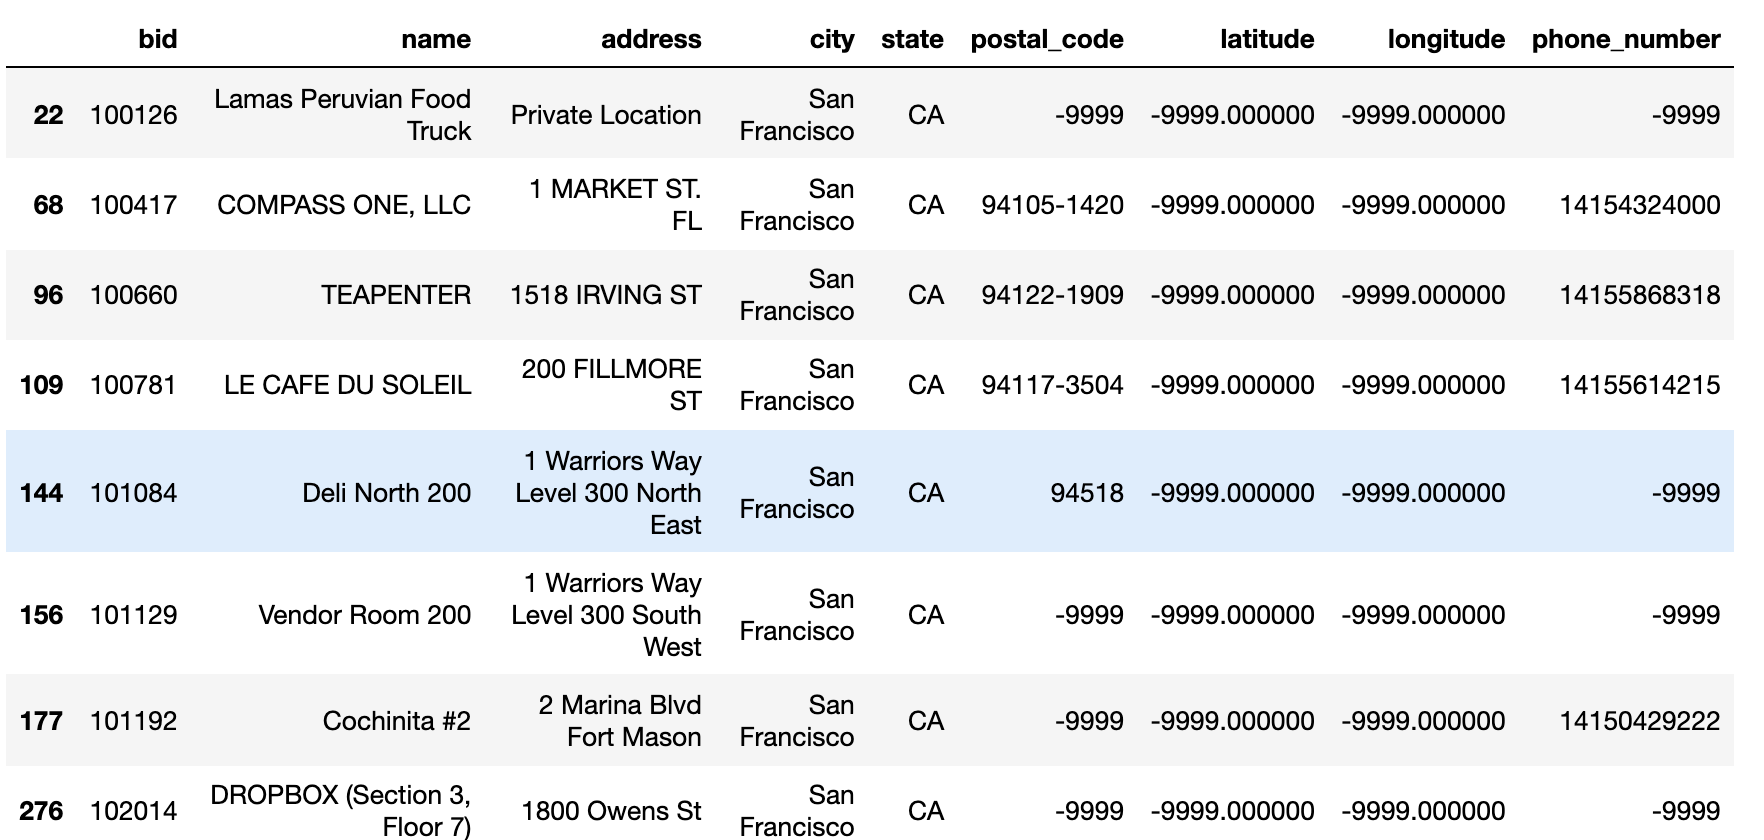

In [ ]:
### part 2 code examples
invalid_zip_bus = bus[~bus.postal_code.isin(valid_zips.zip_codes)]  
##########
invalid_zip_bus = bus[~bus.postal_code.isin(valid_zips)] 

### 2(d) 
`missing_zip_address_count = invalid_zip_bus[invalid_zip_bus.postal_code == '-9999'].value_counts('address')`


### 2(e)
q2e_true_or_false = True

### 2(f)
`bus['postal5'] = None`

`bus['postal5'] = bus['postal_code'].str[0:5]`

`bus.loc[bus.postal5.isin(valid_zips) == False, 'postal5'] = None`

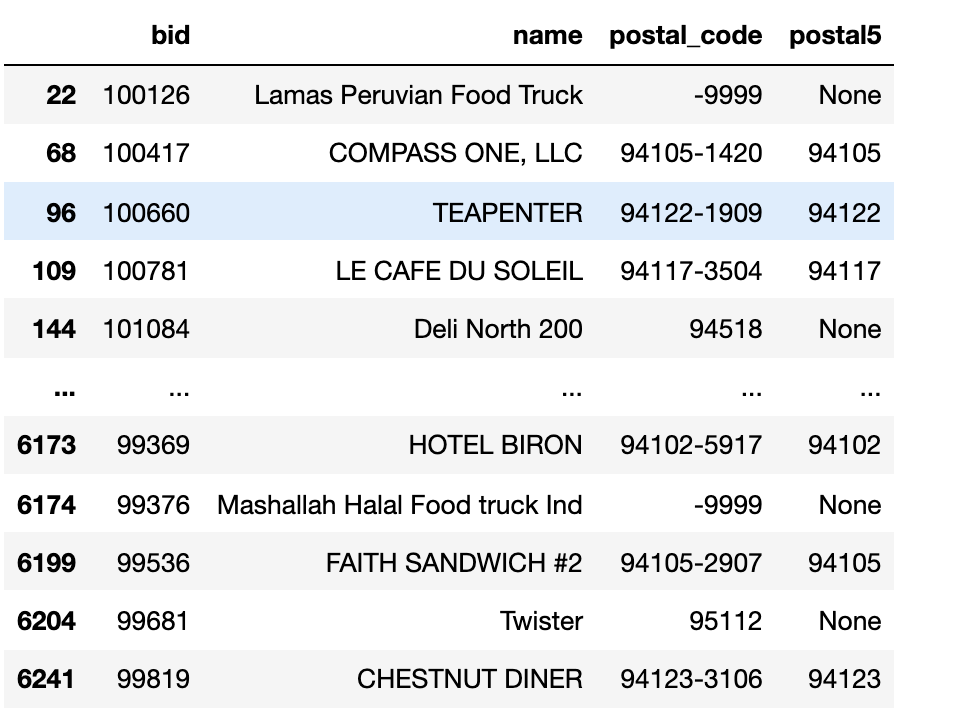

### 3(a)
`is_ins_iid_a_primary_key = len(ins.iid) == len(pd.unique(ins.iid))` or

`is_ins_iid_a_primary_key = len(ins.iid) == len(ins['iid'].unique())` or

`is_ins_iid_a_primary_key = max(ins.value_counts('iid')) == 1`
#### will return true 

### 3(b) part 1

`ins['bid'] = ins['iid'].str.extract('([0-9]+)').astype('int')`

`ins['bid'] = ins['iid'].str[:-9].astype('int')`

`ins['bid'] = ins['iid'].map(lambda x:x.split("_")[0]).astype(int)   `

#### No loop/ list comprehension (1pt)
#### need to convert to int (1pt)



### (3b) part 2
`invalid_bid_count = len(ins['bid'][~ins['bid'].isin(bus['bid'])])`

` The answer is 0 `

### part 3
`q3b_is_foreign_key = True`

### 3(c)
#### part 1
`str`
#### part 2
`ins['timestamp'] = pd.to_datetime(ins['date'], format='%m/%d/%Y %H:%M:%S %p')`
`ins['timestamp'] = pd.to_datetime(ins['date']) `
#### As long as you are using pd.to_datetime
#### part 3
`earliest_date = min(ins['timestamp'])
latest_date = max(ins['timestamp'])`

outputs are: Earliest Date: 2016-10-04 00:00:00
Latest Date: 2019-11-28 00:00:00

#### part 4
`ins['year'] = ins['timestamp'].dt.year`






### 3(d)
`
ins_pivot = pd.pivot_table(ins,index='type',columns='year',values='iid',aggfunc=len,fill_value=0)
ins_pivot['Total'] = ins_pivot.apply(lambda x: x.sum(), axis=1)
ins_pivot_sorted = ins_pivot.sort_values(by='Total',ascending=False)
ins_pivot_sorted
`
#### (2 pt)
could have other solutions (as long as the output is the same as the problem description)

`year_of_new_construction = 2017`

#### (1 pt)

### 3(e)
`newTable = ins
newTable['Missing Score'] = (newTable['score'] == -1)
ins_missing_score_pivot = newTable.pivot_table(index = "type", columns = "Missing Score", values = "score", aggfunc = np.size).replace(np.nan, 0).astype(int)
ins_missing_score_pivot['Total'] = ins_missing_score_pivot.sum(axis = 1)
ins_missing_score_pivot.sort_values(by = 'Total', ascending = False)`

#### could have other solutions (as long as the output is the same as the problem description)


### 4(a)
`ins_named = pd.merge(bus[['bid','name','address']],ins ,on='bid',how='left')
ins_named.head()`
#### as long as using merge and the output is reasonable

### 4(b)
`twenty_lowest_scoring = ins_named.groupby(by=['bid','name'],as_index=False).agg({'score': 'median'})
twenty_lowest_scoring = twenty_lowest_scoring.rename(columns={'score':'median score'}) 
twenty_lowest_scoring = twenty_lowest_scoring.sort_values('median score').head(20)
twenty_lowest_scoring`

Could have other solutions, as long as the output is the same as the problem description

### 4(c)
`low_score_violations = pd.merge(pd.merge(ins[(ins['score']>0)&(ins['score']<65)], ins2vio,how='left'),vio,how='left').value_counts('description')
low_score_violations.head(20)`

`low_score_violations = ins[ins["score"] < 65]
low_score_violations = pd.merge(low_score_violations, ins2vio, on = "iid", how = "left")
low_score_violations = pd.merge(low_score_violations, vio, on = "vid", how = "left")
low_score_violations = low_score_violations['description'].value_counts(ascending=False)`
Could have other solutions, as long as the output is the same as the problem description

### 4(d)
`worst_restaurant = ins_named.sort_values(by=['score'],ascending=True)
worst_restaurant = 'Lollipot'`
#### As long as the output is lollipot

### 5(a)
`score_counts = ins_named.value_counts('score')
plt.bar(score_counts.keys(), score_counts.values)
plt.xlabel('scores')
plt.ylabel('counts')
plt.title('counts for each score')`
<div>
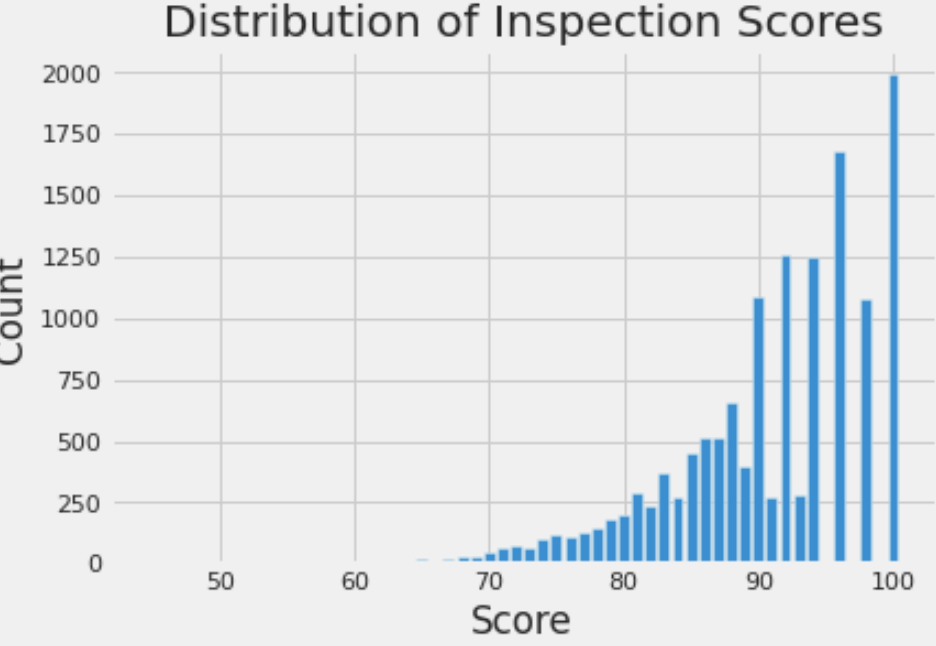
</div>


### 5(b) open ended as long as it is reasonable
left skewed/not symmetric
there seems to be no anomalous values; the distribution is not normal, 
Most of the scores that the restaurants got are between 70 and 100.there are more high scores than low scores.. The most frequent score is 100
 The reason may be people intend to give high scores for good experience more than giving low scores.

### 6(a)
`max_swing_list = ins_named.groupby("name").filter(lambda x: x.shape[0]>=3)

max_swing_list = max_swing_list.groupby("name").agg(np.ptp)
max_swing_list = max_swing_list.sort_values(by="score", ascending=False)
max_swing = max_swing_list.index[0]`
#### Answer is lollipot
0.5 pt for not limiting the group size to be >=3

### 6(b)
`ins2018 = ins[ins['year'] == 2018]
scores_pairs_by_business = ins2018.sort_values('timestamp',ascending=True).groupby(['bid']).filter(lambda x : x['score'].values.size==2).groupby(['bid'],as_index=True).agg({'score':lambda x: list(x)})
scores_pairs_by_business`


`
x,y=zip(*scores_pairs_by_business['score_pair'])
plt.scatter(x,y,facecolors='none',edgecolors='b')
plt.plot([0,100],[0,100],linewidth=1,color='r')
plt.xlabel('first_score')
plt.ylabel('second_score')
plt.axis([0,100,0,100])
plt.title('scatter plot for two scores')`

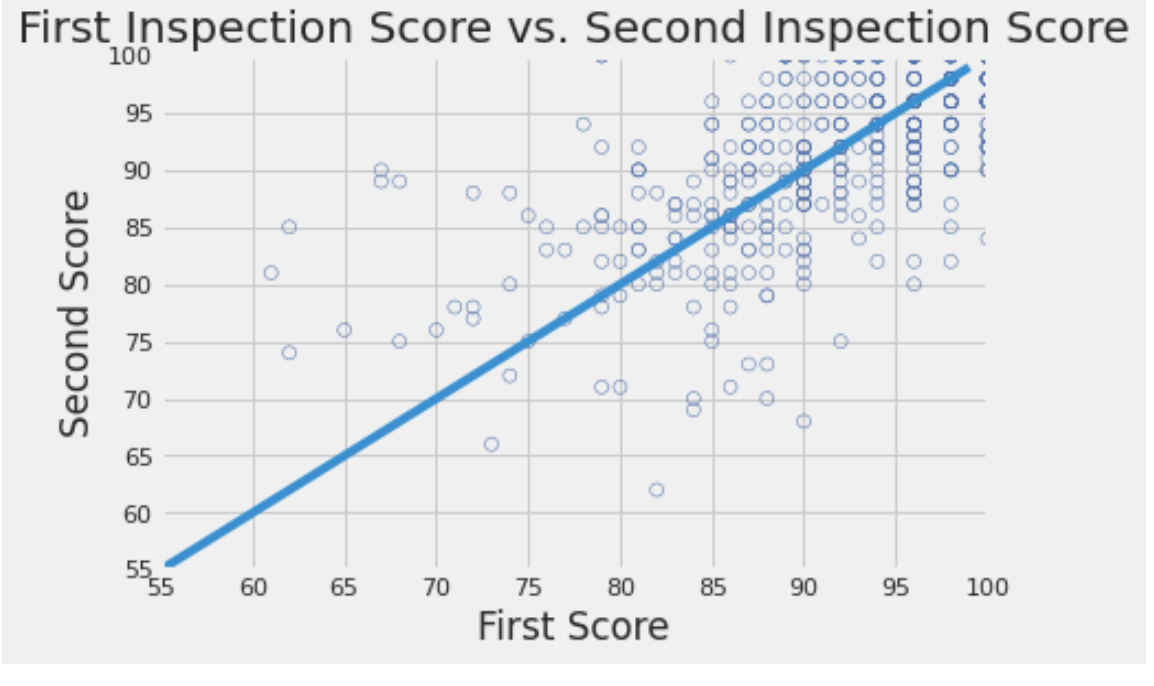

### q(6c) open-ended 2 pt

### q6d as long as we see a box plot (it is ok to plot the 3 years separately/ or collapse all)

```ins_last = ins[(ins['year']>2017)&(ins['year']<2019)]
ins_last = pd.merge(ins_last, ins2vio)
ins_last = pd.merge(ins_last, vio)
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='risk_category',y='score',data=ins_last)
plt.title('risk_category box_plot')```